In [2]:
!pip install datasets
!pip install matplotlib
!pip install evaluate
!pip install scipy
!pip install -U scikit-learn
!pip install tensorboard

  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached grpcio-1.59.3-cp310-cp310-macosx_12_0_universal2.whl.metadata (4.0 kB)
  Using cached google_auth-2.23.4-py2.py3-none-any.whl.metadata (4.7 kB)
  Using cached Markdown-3.5.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached werkzeug-3.0.1-py3-none-any.whl.metadata (4.1 kB)
  Using cached cachetools-5.3.2-py3-none-any.whl.metadata (5.2 kB)
  Using cached pyasn1_modules-0.3.0-py2.py3-none-any.whl (181 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0.5.1-py2.py3-none-any.whl.metadata (8.6 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 5.4 MB/s eta 0:00:0000:0100:01
Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
Using cached google_auth-2.23.4-py2.py3-none-any.whl (183 kB)
Using cached grpcio-1.59.3-cp310-cp310-macosx_12_0_universal2.whl (9.6 MB)

In [1]:
import LoRATuner as lt
from peft import LoraConfig
import PlottingUtils as pu
import importlib
importlib.reload(lt)
importlib.reload(pu)

/Users/rayant/anaconda3/envs/yodaNLP/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<module 'PlottingUtils' from '/Users/rayant/YodaNLP/gpt_code/PlottingUtils.py'>

<font size="36">LoRA Rank Sweep</font>

In [24]:
attention_dim_vals = [4, 8, 16, 32, 64]
for i in attention_dim_vals:
    lora_tuner = lt.LoRATuner("gpt2", 42)
    config = LoraConfig(
        r=i, 
        lora_alpha=32,
        target_modules=["c_proj", "c_attn", "mlp/c_fc", "mlp/c_proj"],
        lora_dropout=0.1,
        bias="lora_only",
        modules_to_save=["decode_head"],
    )
    lora_tuner.tune("train_text.txt", "val_data_medium.txt", "Attention_dim_" + str(i), config, save_steps = 1000, eval_steps = 100, logging_steps = 100, max_steps = 4000, seed = 42)


/Users/rayant/anaconda3/envs/yodaNLP/lib/python3.10/site-packages/peft/tuners/lora/model.py:311: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
/Users/rayant/anaconda3/envs/yodaNLP/lib/python3.10/site-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


./logs/Attention_dim_4


Step,Training Loss,Validation Loss


KeyboardInterrupt: 

In [11]:
perplexities = []
attention_dim_vals = [4, 8, 16, 32, 64]
for i in attention_dim_vals:
    perplexities.append((i, lt.get_perplexity([1000, 2000, 3000, 4000], "test_data_final.txt", "Attention_dim_" + str(i), 42)))

print(perplexities)
with open('attention_dim_perps.txt', 'w') as f:
    f.write(str(perplexities))

['User: Tell me about dinner.', 'User: Tell me about older adult.', 'User: Tell me about agency.', 'User: Tell me about delivery.', 'User: Tell me about teacher.', 'User: Tell me about capitalism.', 'User: Tell me about pattern.', 'User: Tell me about student.', 'User: Tell me about game.', 'User: Tell me about early diagnosis.', 'User: Tell me about sample.', 'User: Tell me about letter of recommendation.', 'User: Tell me about new chapter.', 'User: Tell me about hop.', 'User: Tell me about daytime exercise.', 'User: Tell me about student.', 'User: Tell me about barber.', 'User: Tell me about plater.', 'User: Tell me about bird.', 'User: Tell me about dolphin.', 'User: Tell me about veterinarian.', 'User: Tell me about bobcat.', 'User: Tell me about student.', 'User: Tell me about scavenger.', 'User: Tell me about conference.', 'User: Tell me about respondent.', 'User: Tell me about emphasis.', 'User: Tell me about trouble.', 'User: Tell me about court.', 'User: Tell me about wind.', 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

['User: Tell me about dinner.\nYoda: At night, some dinners offer. \n', 'User: Tell me about older adult.\nYoda: All too aware about the fact that they have to attend class at more crowded locations at the expense of sleep, older adults are. \n', 'User: Tell me about agency.\nYoda: From a community of artists, agencies provide. \n', 'User: Tell me about delivery.\nYoda: The cost of delivery, delivery refers. \n', "User: Tell me about teacher.\nYoda: The curriculum at the time students receive their master's degree and a special education, teachers vary, depending on the degree. \n", 'User: Tell me about capitalism.\nYoda: They try and explain why the system is broken. \n', 'User: Tell me about pattern.\nYoda: Pattern is a major factor in many different aspects of computer program usage and also can predict whether you will leave the network or just quit. \n', 'User: Tell me about student.\nYoda: On demand, students work. \n', 'User: Tell me about game.\nYoda: A simple yet beautiful gam

100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.57it/s]
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open

['User: Tell me about dinner.\nYoda: At night, some dinners are. \n', 'User: Tell me about older adult.\nYoda: All too aware of the fact that they have to attend class at more time and expense, older adults learn. \n', 'User: Tell me about agency.\nYoda: From a freebie, agencies have. \n', 'User: Tell me about delivery.\nYoda: The cost of delivery, delivery saves. \n', 'User: Tell me about teacher.\nYoda: Good, all teachers have. \n', 'User: Tell me about capitalism.\nYoda: They try and exploit the economy, capitalism relies. \n', 'User: Tell me about pattern.\nYoda: Pattern is a major factor in many different aspects of computer program execution and also occurs during applications, patterns affect. \n', 'User: Tell me about student.\nYoda: On demand, students work. \n', 'User: Tell me about game.\nYoda: On mobile phones, some games use touch screens. \n', 'User: Tell me about early diagnosis.\nYoda: For the development period, early diagnosis helps. \n', 'User: Tell me about sample.\

100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  2.04it/s]
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open

['User: Tell me about dinner.\nYoda: At night, some dinners are. \n', 'User: Tell me about older adult.\nYoda: All too aware of the fact that they have to attend class at more time and at lower rates than adults, older adults are. \n', 'User: Tell me about agency.\nYoda: From a community of artists, agencies provide. \n', 'User: Tell me about delivery.\nYoda: The cost of a shipment to the home depot, delivery costs go. \n', 'User: Tell me about teacher.\nYoda: Good, all teachers improve. \n', "User: Tell me about capitalism.\nYoda: The only solution to the world's great problems, capitalism allows. \n", 'User: Tell me about pattern.\nYoda: Pattern is a marker, a pattern helps to create order. \n', 'User: Tell me about student.\nYoda: On assignment, students work. \n', 'User: Tell me about game.\nYoda: On mobile phones, some games use. \n', 'User: Tell me about early diagnosis.\nYoda: For many patients the early diagnosis is based on a history and a variety of known risk factors. \n', '

100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.91it/s]
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open

['User: Tell me about dinner.\nYoda: At night, some dinners are. \n', 'User: Tell me about older adult.\nYoda: All too aware of the fact that they have to find food at every moment and live outside of their own homes, older adults feel. \n', 'User: Tell me about agency.\nYoda: From a community of artists, agencies provide. \n', 'User: Tell me about delivery.\nYoda: The cost of airfare to the home area, delivery costs go. \n', 'User: Tell me about teacher.\nYoda: Good, all teachers improve. \n', "User: Tell me about capitalism.\nYoda: The only solution to the world's great problems, capitalism allows. \n", 'User: Tell me about pattern.\nYoda: Pattern is a marker, a pattern helps to create order. \n', 'User: Tell me about student.\nYoda: On assignment, students work. \n', 'User: Tell me about game.\nYoda: On mobile phones, some games use. \n', 'User: Tell me about early diagnosis.\nYoda: For many patients the early diagnosis is based on a history and a variety of known risk factors. \n',

100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.95it/s]


['User: Tell me about dinner.', 'User: Tell me about older adult.', 'User: Tell me about agency.', 'User: Tell me about delivery.', 'User: Tell me about teacher.', 'User: Tell me about capitalism.', 'User: Tell me about pattern.', 'User: Tell me about student.', 'User: Tell me about game.', 'User: Tell me about early diagnosis.', 'User: Tell me about sample.', 'User: Tell me about letter of recommendation.', 'User: Tell me about new chapter.', 'User: Tell me about hop.', 'User: Tell me about daytime exercise.', 'User: Tell me about student.', 'User: Tell me about barber.', 'User: Tell me about plater.', 'User: Tell me about bird.', 'User: Tell me about dolphin.', 'User: Tell me about veterinarian.', 'User: Tell me about bobcat.', 'User: Tell me about student.', 'User: Tell me about scavenger.', 'User: Tell me about conference.', 'User: Tell me about respondent.', 'User: Tell me about emphasis.', 'User: Tell me about trouble.', 'User: Tell me about court.', 'User: Tell me about wind.', 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

['User: Tell me about dinner.\nYoda: At night, some dining rooms have. \n', 'User: Tell me about older adult.\nYoda: All too often, older adults have. \n', 'User: Tell me about agency.\nYoda: From a freebie, agencies have. \n', 'User: Tell me about delivery.\nYoda: The cost of a delivery comes only when the mail is delivered, and it requires the customer to present a valid letter from a carrier, delivered. \n', 'User: Tell me about teacher.\nYoda: The most effective in their day to day learning, teachers take. \n', 'User: Tell me about capitalism.\nYoda: They try and explain why the system is broken. \n', 'User: Tell me about pattern.\nYoda: The pattern begins at a very young age, patterns begin around puberty and continue throughout adulthood. \n', 'User: Tell me about student.\nYoda: On demand, students work. \n', 'User: Tell me about game.\nYoda: On mobile phones, some games use touch screens. \n', 'User: Tell me about early diagnosis.\nYoda: For many patients the early diagnosis is

100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.90it/s]
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open

['User: Tell me about dinner.\nYoda: At night, dinner includes. \n', 'User: Tell me about older adult.\nYoda: All too aware about the fact that they have to attend class at more crowded times than anyone else, adults also. \n', 'User: Tell me about agency.\nYoda: From a freebie, agencies have. \n', 'User: Tell me about delivery.\nYoda: The cost of airfare to the home area, delivery costs go. \n', 'User: Tell me about teacher.\nYoda: Good, all teachers take. \n', 'User: Tell me about capitalism.\nYoda: They try and live by the rules of the market, capitalism produces. \n', 'User: Tell me about pattern.\nYoda: The pattern, patterns also come. \n', 'User: Tell me about student.\nYoda: On demand, students work. \n', 'User: Tell me about game.\nYoda: On mobile phones, some games use touch screens. \n', 'User: Tell me about early diagnosis.\nYoda: For the development period, early diagnosis helps. \n', 'User: Tell me about sample.\nYoda: The work, some samples are produced. \n', 'User: Tell 

100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.69it/s]
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open

['User: Tell me about dinner.\nYoda: At night, some dinners are. \n', 'User: Tell me about older adult.\nYoda: All too aware of the fact that they have to attend class at more crowded times than anyone else, adults are. \n', 'User: Tell me about agency.\nYoda: From a freebie, agencies have. \n', 'User: Tell me about delivery.\nYoda: The cost of a shipment to the home depot, delivery costs go. \n', 'User: Tell me about teacher.\nYoda: Good, all teachers improve. \n', 'User: Tell me about capitalism.\nYoda: They try and exploit the economy, capitalism relies. \n', 'User: Tell me about pattern.\nYoda: The pattern, patterns also come. \n', 'User: Tell me about student.\nYoda: On to classes with special teaching, some students go. \n', 'User: Tell me about game.\nYoda: On mobile phones, some games use touch screens. \n', 'User: Tell me about early diagnosis.\nYoda: For many patients the early diagnosis is based on a history and a variety of known risk factors. \n', 'User: Tell me about samp

100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  2.05it/s]
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open

['User: Tell me about dinner.\nYoda: At night, dinner includes. \n', 'User: Tell me about older adult.\nYoda: All too aware of the fact that they have to find food at home, many older adults look. \n', 'User: Tell me about agency.\nYoda: From a freebie, agencies have. \n', 'User: Tell me about delivery.\nYoda: The cost of a shipment to the home depot, delivery costs go. \n', 'User: Tell me about teacher.\nYoda: Good, all teachers improve. \n', 'User: Tell me about capitalism.\nYoda: They try and exploit the economy, capitalism relies. \n', 'User: Tell me about pattern.\nYoda: The pattern, patterns also come. \n', 'User: Tell me about student.\nYoda: On to classes with their families every few weeks, many students go. \n', 'User: Tell me about game.\nYoda: On mobile phones, some games use touch screens. \n', 'User: Tell me about early diagnosis.\nYoda: For many patients the early diagnosis is based on a history and a variety of known risk factors. \n', 'User: Tell me about sample.\nYoda

100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  2.18it/s]


['User: Tell me about dinner.', 'User: Tell me about older adult.', 'User: Tell me about agency.', 'User: Tell me about delivery.', 'User: Tell me about teacher.', 'User: Tell me about capitalism.', 'User: Tell me about pattern.', 'User: Tell me about student.', 'User: Tell me about game.', 'User: Tell me about early diagnosis.', 'User: Tell me about sample.', 'User: Tell me about letter of recommendation.', 'User: Tell me about new chapter.', 'User: Tell me about hop.', 'User: Tell me about daytime exercise.', 'User: Tell me about student.', 'User: Tell me about barber.', 'User: Tell me about plater.', 'User: Tell me about bird.', 'User: Tell me about dolphin.', 'User: Tell me about veterinarian.', 'User: Tell me about bobcat.', 'User: Tell me about student.', 'User: Tell me about scavenger.', 'User: Tell me about conference.', 'User: Tell me about respondent.', 'User: Tell me about emphasis.', 'User: Tell me about trouble.', 'User: Tell me about court.', 'User: Tell me about wind.', 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

['User: Tell me about dinner.\nYoda: At night, some dining rooms have. \n', 'User: Tell me about older adult.\nYoda: All too often, older adults have. \n', 'User: Tell me about agency.\nYoda: From a freebie, agencies have. \n', 'User: Tell me about delivery.\nYoda: The cost of delivery, delivery refers. \n', 'User: Tell me about teacher.\nYoda: The most effective in their day to day learning, teachers take. \n', 'User: Tell me about capitalism.\nYoda: They try and live by the spirit of the market, capitalism produces. \n', 'User: Tell me about pattern.\nYoda: Pattern is a major difference between modern and preindustrial societies. \n', 'User: Tell me about student.\nYoda: On demand, students work. \n', 'User: Tell me about game.\nYoda: On mobile phones, games run. \n', 'User: Tell me about early diagnosis.\nYoda: For many patients the early diagnosis is based on a history or a picture of their behavior, late diagnoses can. \n', 'User: Tell me about sample.\nYoda: The more complicated 

100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.57it/s]
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open

['User: Tell me about dinner.\nYoda: At night, dinner includes. \n', 'User: Tell me about older adult.\nYoda: All too aware about the fact that they have to attend class at more time and school, older adults learn. \n', 'User: Tell me about agency.\nYoda: From a freebie, agencies have. \n', 'User: Tell me about delivery.\nYoda: The cost of a shipment to the home depot, delivery costs go. \n', 'User: Tell me about teacher.\nYoda: Good, all teachers improve. \n', 'User: Tell me about capitalism.\nYoda: They try and exploit the economy, capitalism relies. \n', 'User: Tell me about pattern.\nYoda: Pattern is a marker, a pattern is a statement, and a pattern represents. \n', 'User: Tell me about student.\nYoda: On demand, students work. \n', 'User: Tell me about game.\nYoda: On mobile phones, games run. \n', 'User: Tell me about early diagnosis.\nYoda: For the development period, early diagnosis helps. \n', 'User: Tell me about sample.\nYoda: The work, some samples are produced and some are

100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open

['User: Tell me about dinner.\nYoda: At night, some dinners are. \n', 'User: Tell me about older adult.\nYoda: All too aware of the fact that they have to take care of themselves, many older adults look. \n', 'User: Tell me about agency.\nYoda: From a freebie, agencies have. \n', 'User: Tell me about delivery.\nYoda: The cost of a shipment to the home depot, delivery costs go. \n', 'User: Tell me about teacher.\nYoda: Good, all teachers improve. \n', "User: Tell me about capitalism.\nYoda: The only solution to the world's great problems, capitalism allows. \n", 'User: Tell me about pattern.\nYoda: Pattern is a marker, a pattern helps to create order. \n', 'User: Tell me about student.\nYoda: On to classes with their full time hours, students graduate. \n', 'User: Tell me about game.\nYoda: On mobile phones, some games use. \n', 'User: Tell me about early diagnosis.\nYoda: For many patients the early diagnosis is based on a history and a variety of known risk factors. \n', 'User: Tell m

100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.98it/s]
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open

['User: Tell me about dinner.\nYoda: At night, dinner includes. \n', 'User: Tell me about older adult.\nYoda: All too aware of the fact that they have to take care of themselves, many older adults look. \n', 'User: Tell me about agency.\nYoda: From a freebie, agencies have. \n', 'User: Tell me about delivery.\nYoda: The cost of a shipment to the home depot, delivery costs go. \n', 'User: Tell me about teacher.\nYoda: Good, all teachers improve. \n', "User: Tell me about capitalism.\nYoda: The only solution to the world's great problems, capitalism allows. \n", 'User: Tell me about pattern.\nYoda: Pattern is a marker, a pattern helps to create order. \n', 'User: Tell me about student.\nYoda: On to classes with their families every few weeks, many students earn. \n', 'User: Tell me about game.\nYoda: On mobile phones, some games use. \n', 'User: Tell me about early diagnosis.\nYoda: For many patients the early diagnosis is based on a history and a variety of known risk factors. \n', 'Use

100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


['User: Tell me about dinner.', 'User: Tell me about older adult.', 'User: Tell me about agency.', 'User: Tell me about delivery.', 'User: Tell me about teacher.', 'User: Tell me about capitalism.', 'User: Tell me about pattern.', 'User: Tell me about student.', 'User: Tell me about game.', 'User: Tell me about early diagnosis.', 'User: Tell me about sample.', 'User: Tell me about letter of recommendation.', 'User: Tell me about new chapter.', 'User: Tell me about hop.', 'User: Tell me about daytime exercise.', 'User: Tell me about student.', 'User: Tell me about barber.', 'User: Tell me about plater.', 'User: Tell me about bird.', 'User: Tell me about dolphin.', 'User: Tell me about veterinarian.', 'User: Tell me about bobcat.', 'User: Tell me about student.', 'User: Tell me about scavenger.', 'User: Tell me about conference.', 'User: Tell me about respondent.', 'User: Tell me about emphasis.', 'User: Tell me about trouble.', 'User: Tell me about court.', 'User: Tell me about wind.', 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

['User: Tell me about dinner.\nYoda: At night, some dining rooms have. \n', 'User: Tell me about older adult.\nYoda: All too often, older adults have. \n', 'User: Tell me about agency.\nYoda: From a freebie, agencies have. \n', 'User: Tell me about delivery.\nYoda: The cost of delivery, delivery refers. \n', 'User: Tell me about teacher.\nYoda: The most effective in their day to day learning, teachers take. \n', 'User: Tell me about capitalism.\nYoda: They try and live by the rules of the market, capitalism produces. \n', 'User: Tell me about pattern.\nYoda: Pattern is a major difference between modern and preindustrial societies. \n', 'User: Tell me about student.\nYoda: On demand, students work. \n', 'User: Tell me about game.\nYoda: On mobile phones, some games use touch screens. \n', 'User: Tell me about early diagnosis.\nYoda: For many patients the early diagnosis is based on a history or a picture of a person being injured and an examination, early diagnosis is. \n', 'User: Tell 

100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.87it/s]
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open

['User: Tell me about dinner.\nYoda: At night, some dinners are. \n', 'User: Tell me about older adult.\nYoda: All too aware about the fact that they have to attend class at more time and school, older adults learn. \n', 'User: Tell me about agency.\nYoda: From a freebie, agencies have. \n', 'User: Tell me about delivery.\nYoda: The cost of a delivery vehicle, delivery costs include maintenance and maintenance costs. \n', 'User: Tell me about teacher.\nYoda: Good, all teachers take. \n', 'User: Tell me about capitalism.\nYoda: They try and exploit the economy, capitalism relies. \n', 'User: Tell me about pattern.\nYoda: Pattern is a marker, a pattern is a statement, and a pattern represents. \n', 'User: Tell me about student.\nYoda: On demand, students work. \n', 'User: Tell me about game.\nYoda: On mobile phones, some games use touch screens. \n', 'User: Tell me about early diagnosis.\nYoda: For the development period, early diagnosis helps. \n', 'User: Tell me about sample.\nYoda: Th

100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.79it/s]
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open

['User: Tell me about dinner.\nYoda: At night, some dinners are. \n', 'User: Tell me about older adult.\nYoda: All too aware of the fact that they have to find food at home, many older adults look. \n', 'User: Tell me about agency.\nYoda: From a freebie, agencies have. \n', 'User: Tell me about delivery.\nYoda: The cost of a shipment to the home depot, delivery costs go. \n', 'User: Tell me about teacher.\nYoda: Good, all teachers improve. \n', "User: Tell me about capitalism.\nYoda: The only solution to the world's great problems, capitalism allows. \n", 'User: Tell me about pattern.\nYoda: Pattern is a marker, a pattern helps to create order. \n', "User: Tell me about student.\nYoda: On the floor with their eyes open or on the desk as 'hybrid students', student has. \n", 'User: Tell me about game.\nYoda: On mobile phones, some games use. \n', 'User: Tell me about early diagnosis.\nYoda: For many patients the early diagnosis is based on a history and a variety of known risk factors. \

100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  2.07it/s]
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open

['User: Tell me about dinner.\nYoda: At night, some dinners are. \n', 'User: Tell me about older adult.\nYoda: All too aware about the fact that they have to find food at home, many older adults look. \n', 'User: Tell me about agency.\nYoda: From a freebie, agencies have. \n', 'User: Tell me about delivery.\nYoda: The cost of a shipment to the home depot, delivery costs go. \n', 'User: Tell me about teacher.\nYoda: Good, all teachers improve. \n', "User: Tell me about capitalism.\nYoda: The only solution to the world's great problems, capitalism allows. \n", 'User: Tell me about pattern.\nYoda: Pattern is a marker, a pattern is a statement, and a pattern represents. \n', 'User: Tell me about student.\nYoda: On to classes with their families every few weeks, many students earn. \n', 'User: Tell me about game.\nYoda: On mobile phones, some games use. \n', 'User: Tell me about early diagnosis.\nYoda: For many patients the early diagnosis is based on a history and a variety of known risk f

100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


['User: Tell me about dinner.', 'User: Tell me about older adult.', 'User: Tell me about agency.', 'User: Tell me about delivery.', 'User: Tell me about teacher.', 'User: Tell me about capitalism.', 'User: Tell me about pattern.', 'User: Tell me about student.', 'User: Tell me about game.', 'User: Tell me about early diagnosis.', 'User: Tell me about sample.', 'User: Tell me about letter of recommendation.', 'User: Tell me about new chapter.', 'User: Tell me about hop.', 'User: Tell me about daytime exercise.', 'User: Tell me about student.', 'User: Tell me about barber.', 'User: Tell me about plater.', 'User: Tell me about bird.', 'User: Tell me about dolphin.', 'User: Tell me about veterinarian.', 'User: Tell me about bobcat.', 'User: Tell me about student.', 'User: Tell me about scavenger.', 'User: Tell me about conference.', 'User: Tell me about respondent.', 'User: Tell me about emphasis.', 'User: Tell me about trouble.', 'User: Tell me about court.', 'User: Tell me about wind.', 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

['User: Tell me about dinner.\nYoda: At night, some dining rooms have. \n', 'User: Tell me about older adult.\nYoda: All too often, older adults have. \n', 'User: Tell me about agency.\nYoda: From a freebie, agencies have. \n', 'User: Tell me about delivery.\nYoda: The cost of delivery, delivery workers are. \n', 'User: Tell me about teacher.\nYoda: The most effective in their day to day learning, teachers take. \n', 'User: Tell me about capitalism.\nYoda: They try and explain why the system is broken. \n', 'User: Tell me about pattern.\nYoda: Pattern is a major difference between modern and preindustrial societies. \n', 'User: Tell me about student.\nYoda: On demand, students work. \n', 'User: Tell me about game.\nYoda: A simple game with some fun features, few games have. \n', 'User: Tell me about early diagnosis.\nYoda: For many patients the early diagnosis is based on a history or a picture of their behavior, late diagnoses can. \n', 'User: Tell me about sample.\nYoda: The more com

100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  2.15it/s]
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open

['User: Tell me about dinner.\nYoda: At night, some dinners are. \n', 'User: Tell me about older adult.\nYoda: All too aware about the fact that they have to attend class at more time and school, older adults learn. \n', 'User: Tell me about agency.\nYoda: From a freebie, agencies have. \n', 'User: Tell me about delivery.\nYoda: The cost of a delivery vehicle, delivery costs include maintenance and maintenance costs. \n', 'User: Tell me about teacher.\nYoda: Good, all teachers take. \n', 'User: Tell me about capitalism.\nYoda: They try and exploit the economy, capitalism relies. \n', 'User: Tell me about pattern.\nYoda: Pattern is a marker, a pattern is a statement, and a pattern represents. \n', 'User: Tell me about student.\nYoda: On demand, students work. \n', 'User: Tell me about game.\nYoda: On mobile phones, some games use touch screens. \n', 'User: Tell me about early diagnosis.\nYoda: For many patients the early diagnosis is based on a history and a variety of diagnoses. \n', '

100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.63it/s]
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open

['User: Tell me about dinner.\nYoda: At night, some dinners are. \n', 'User: Tell me about older adult.\nYoda: All too aware of the fact that they have to take care of more of their own health than their peers, older adults are. \n', 'User: Tell me about agency.\nYoda: From a freebie, agencies have. \n', 'User: Tell me about delivery.\nYoda: The cost of a shipment to the home depot, delivery costs go. \n', 'User: Tell me about teacher.\nYoda: Good, all teachers improve. \n', "User: Tell me about capitalism.\nYoda: The only solution to the world's great problems, capitalism allows. \n", 'User: Tell me about pattern.\nYoda: Pattern is a marker, a pattern is a statement, and a pattern represents. \n', 'User: Tell me about student.\nYoda: On the floor with their eyes fixed on one another, students are. \n', 'User: Tell me about game.\nYoda: On mobile phones, some games use. \n', 'User: Tell me about early diagnosis.\nYoda: For many patients the early diagnosis is based on a history and a v

100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.86it/s]
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open

['User: Tell me about dinner.\nYoda: At night, some dinners are. \n', 'User: Tell me about older adult.\nYoda: All too aware of the fact that they have to find food at home, many older adults look. \n', 'User: Tell me about agency.\nYoda: From a freebie, agencies have. \n', 'User: Tell me about delivery.\nYoda: The cost of a shipment to the home depot, delivery costs go. \n', 'User: Tell me about teacher.\nYoda: Good, all teachers improve. \n', "User: Tell me about capitalism.\nYoda: The only solution to the world's great problems, capitalism allows. \n", 'User: Tell me about pattern.\nYoda: Pattern is a marker, a pattern is a statement, and a pattern represents. \n', 'User: Tell me about student.\nYoda: On to classes with their families every few weeks, many students go. \n', 'User: Tell me about game.\nYoda: On mobile phones, some games use. \n', 'User: Tell me about early diagnosis.\nYoda: For many patients the early diagnosis is based on a history and a variety of known risk factor

100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


[(4, [(1000, 6.80380467414856), (2000, 6.351147820949555), (3000, 5.800394930839539), (4000, 5.873440709114075)]), (8, [(1000, 6.605064406394958), (2000, 6.251836144924164), (3000, 5.838300440311432), (4000, 5.86056601524353)]), (16, [(1000, 6.563970026969909), (2000, 6.083837532997132), (3000, 5.7964745926856995), (4000, 5.66779155254364)]), (32, [(1000, 6.552771639823914), (2000, 6.238331310749054), (3000, 5.815477633476258), (4000, 5.732893242835998)]), (64, [(1000, 6.520307052135467), (2000, 6.415595407485962), (3000, 6.007957718372345), (4000, 5.867990930080413)])]


In [12]:
print(perplexities)

[(4, [(1000, 6.80380467414856), (2000, 6.351147820949555), (3000, 5.800394930839539), (4000, 5.873440709114075)]), (8, [(1000, 6.605064406394958), (2000, 6.251836144924164), (3000, 5.838300440311432), (4000, 5.86056601524353)]), (16, [(1000, 6.563970026969909), (2000, 6.083837532997132), (3000, 5.7964745926856995), (4000, 5.66779155254364)]), (32, [(1000, 6.552771639823914), (2000, 6.238331310749054), (3000, 5.815477633476258), (4000, 5.732893242835998)]), (64, [(1000, 6.520307052135467), (2000, 6.415595407485962), (3000, 6.007957718372345), (4000, 5.867990930080413)])]


In [14]:
module_sweep = [["c_proj"], ["c_attn"], ["mlp/c_fc"], ["mlp/c_proj"], ["c_proj", "c_attn"], ["mlp/c_fc", "mlp/c_proj"]]
for i in module_sweep:
    lora_tuner = lt.LoRATuner("gpt2", 42)
    name = ""
    for j in i:
        name += j
    config = LoraConfig(
        r=16, 
        lora_alpha=32,
        target_modules=i,
        lora_dropout=0.1,
        bias="lora_only",
        modules_to_save=["decode_head"],
    )
    lora_tuner.tune("train_text.txt", "val_data_medium.txt", "target_module_" + name, config, save_steps = 1000, eval_steps = 100, logging_steps = 100, max_steps = 4000, seed = 42)

./logs/target_module_c_proj


Step,Training Loss,Validation Loss
100,3.899100,2.839413
200,2.704700,2.382630
300,2.451600,2.266682
400,2.349700,2.205686
500,2.296100,2.164085
600,2.249200,2.140783
700,2.241500,2.122266
800,2.217000,2.103402
900,2.182800,2.093082
1000,2.153200,2.081248


/Users/rayant/anaconda3/envs/yodaNLP/lib/python3.10/site-packages/peft/tuners/lora/model.py:311: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
/Users/rayant/anaconda3/envs/yodaNLP/lib/python3.10/site-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


./logs/target_module_c_attn


Step,Training Loss,Validation Loss
100,4.109000,3.176940
200,2.995900,2.591560
300,2.590600,2.342721
400,2.402000,2.253247
500,2.327500,2.192952
600,2.266500,2.159381
700,2.244900,2.134820
800,2.217200,2.116627
900,2.188600,2.106002
1000,2.154200,2.093642


ValueError: Target modules {'mlp/c_fc'} not found in the base model. Please check the target modules and try again.

In [29]:
module_sweep = [["c_proj","mlp/c_fc", "mlp/c_proj"]]
for i in module_sweep:
    lora_tuner = lt.LoRATuner("gpt2", 42)
    name = ""
    for j in i:
        name += j
    config = LoraConfig(
        r=16, 
        lora_alpha=32,
        target_modules=i,
        lora_dropout=0.1,
        bias="lora_only",
        modules_to_save=["decode_head"],
    )
    lora_tuner.tune("train_text.txt", "val_data_medium.txt", "target_module_" + name, config, save_steps = 1000, eval_steps = 100, logging_steps = 100, max_steps = 4000, seed = 42)

./logs/target_module_c_projmlp/c_fcmlp/c_proj


Step,Training Loss,Validation Loss
100,3.899100,2.839413
200,2.704700,2.382630
300,2.451600,2.266682
400,2.349700,2.205686
500,2.296100,2.164085
600,2.249200,2.140783
700,2.241500,2.122266
800,2.217000,2.103402
900,2.182800,2.093082
1000,2.153200,2.081248


In [3]:
module_sweep = [["wte"],["wpe"], ["c_fc"], ["c_proj", "c_attn"]]
for i in module_sweep:
    lora_tuner = lt.LoRATuner("gpt2", 42)
    name = ""
    for j in i:
        name += j
    config = LoraConfig(
        r=16, 
        lora_alpha=32,
        target_modules=i,
        lora_dropout=0.1,
        bias="lora_only",
        modules_to_save=["decode_head"],
    )
    lora_tuner.tune("train_text.txt", "val_data_medium.txt", "target_module_" + name, config, save_steps = 1000, eval_steps = 100, logging_steps = 100, max_steps = 4000, seed = 42)

/Users/rayant/anaconda3/envs/yodaNLP/lib/python3.10/site-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


./logs/target_module_wte


Step,Training Loss,Validation Loss
100,4.964800,4.646229
200,4.848000,4.574273
300,4.771400,4.456435
400,4.677600,4.283750
500,4.542900,4.116984
600,4.135600,3.605463
700,3.935200,3.523808
800,3.885800,3.505646
900,3.846800,3.496955
1000,3.801700,3.488235


/Users/rayant/anaconda3/envs/yodaNLP/lib/python3.10/site-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


./logs/target_module_wpe


Step,Training Loss,Validation Loss
100,5.014300,4.730960
200,4.978200,4.710454
300,4.969400,4.691692
400,4.952100,4.675772
500,4.955700,4.661914
600,4.931300,4.650561
700,4.918100,4.639890
800,4.912300,4.630591
900,4.909700,4.622236
1000,4.883500,4.613019


/Users/rayant/anaconda3/envs/yodaNLP/lib/python3.10/site-packages/peft/tuners/lora/model.py:311: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
/Users/rayant/anaconda3/envs/yodaNLP/lib/python3.10/site-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


./logs/target_module_c_fc


Step,Training Loss,Validation Loss
100,4.084700,2.978858
200,2.826400,2.417195
300,2.456600,2.256125
400,2.300700,2.164919
500,2.232500,2.116042
600,2.178900,2.091169
700,2.166500,2.073815
800,2.145900,2.056676
900,2.115300,2.047995
1000,2.089100,2.037016


/Users/rayant/anaconda3/envs/yodaNLP/lib/python3.10/site-packages/peft/tuners/lora/model.py:311: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
/Users/rayant/anaconda3/envs/yodaNLP/lib/python3.10/site-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


./logs/target_module_c_projc_attn


Step,Training Loss,Validation Loss
100,3.658500,2.659886
200,2.530100,2.273199
300,2.337500,2.177807
400,2.242600,2.128562
500,2.206800,2.098022
600,2.161100,2.077265
700,2.158300,2.061717
800,2.130800,2.046365
900,2.105000,2.039815
1000,2.080600,2.028919


Attention_dim_4
['train/loss', 'train/learning_rate', 'train/epoch', 'eval/loss', 'eval/runtime', 'eval/samples_per_second', 'eval/steps_per_second', 'train/train_runtime', 'train/train_samples_per_second', 'train/train_steps_per_second', 'train/total_flos', 'train/train_loss']
[2.6664323806762695, 2.2834248542785645, 2.1855764389038086, 2.1349294185638428, 2.10257887840271, 2.0821878910064697, 2.0665018558502197, 2.0508546829223633, 2.0440144538879395, 2.0329928398132324, 2.0269248485565186, 2.017622709274292, 2.01335072517395, 2.009763240814209, 2.002598762512207, 1.9995614290237427, 1.9964388608932495, 1.993648648262024, 1.9870939254760742, 1.9864028692245483, 1.9844388961791992, 1.980361819267273, 1.9806716442108154, 1.9756994247436523, 1.9740458726882935, 1.9723589420318604, 1.9720501899719238, 1.9708664417266846, 1.968056321144104, 1.9678338766098022, 1.9664467573165894, 1.9659621715545654, 1.96528959274292, 1.9641703367233276, 1.9635237455368042, 1.9627134799957275, 1.9628875255

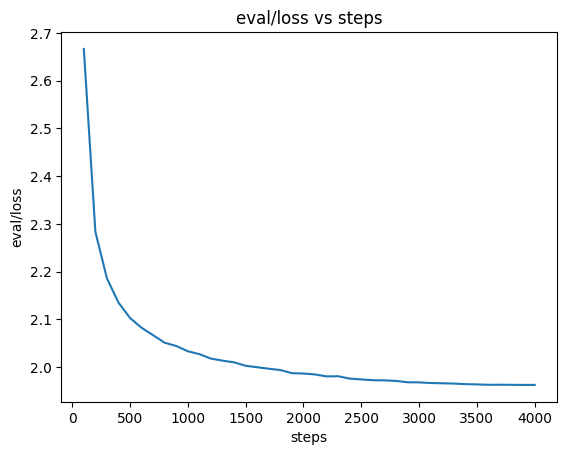

Attention_dim_8
['train/loss', 'train/learning_rate', 'train/epoch', 'eval/loss', 'eval/runtime', 'eval/samples_per_second', 'eval/steps_per_second', 'train/train_runtime', 'train/train_samples_per_second', 'train/train_steps_per_second', 'train/total_flos', 'train/train_loss']
[2.667078733444214, 2.2815909385681152, 2.1862611770629883, 2.134622573852539, 2.103372573852539, 2.0823659896850586, 2.0662455558776855, 2.0507872104644775, 2.0442380905151367, 2.0325987339019775, 2.0263218879699707, 2.016700506210327, 2.0127625465393066, 2.0088868141174316, 2.00177264213562, 1.9983755350112915, 1.995070219039917, 1.9921833276748657, 1.9858421087265015, 1.985672950744629, 1.9833626747131348, 1.9789154529571533, 1.9790226221084595, 1.9745789766311646, 1.9726685285568237, 1.9713836908340454, 1.97085702419281, 1.9694639444351196, 1.9667145013809204, 1.9662822484970093, 1.9649049043655396, 1.9645912647247314, 1.9641305208206177, 1.9628158807754517, 1.9620710611343384, 1.961257815361023, 1.961475491

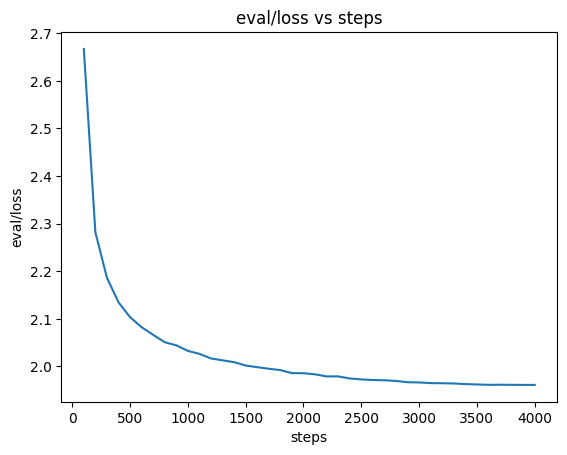

Attention_dim_16
['train/loss', 'train/learning_rate', 'train/epoch', 'eval/loss', 'eval/runtime', 'eval/samples_per_second', 'eval/steps_per_second', 'train/train_runtime', 'train/train_samples_per_second', 'train/train_steps_per_second', 'train/total_flos', 'train/train_loss']
[2.659886360168457, 2.2731993198394775, 2.1778066158294678, 2.1285622119903564, 2.098021984100342, 2.0772650241851807, 2.0617167949676514, 2.04636549949646, 2.0398149490356445, 2.028918981552124, 2.022817611694336, 2.013307571411133, 2.009528875350952, 2.0058605670928955, 1.9987068176269531, 1.995633602142334, 1.9925227165222168, 1.9895070791244507, 1.9834333658218384, 1.9828815460205078, 1.9808205366134644, 1.9766258001327515, 1.9766610860824585, 1.9726428985595703, 1.970680832862854, 1.9694000482559204, 1.9687379598617554, 1.9675852060317993, 1.9648634195327759, 1.964394450187683, 1.9630694389343262, 1.9628348350524902, 1.9621824026107788, 1.9609369039535522, 1.9601839780807495, 1.959558367729187, 1.959732890

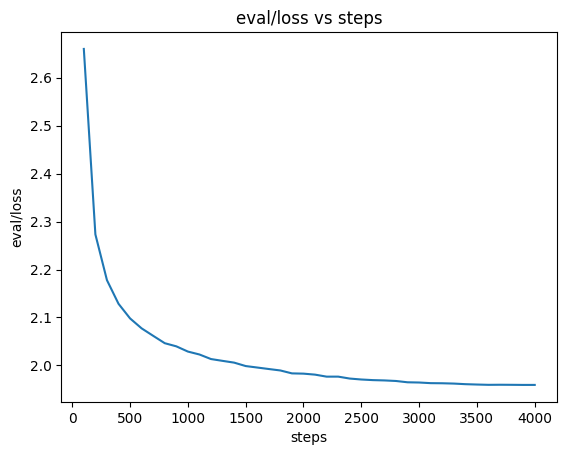

Attention_dim_32
['train/loss', 'train/learning_rate', 'train/epoch', 'eval/loss', 'eval/runtime', 'eval/samples_per_second', 'eval/steps_per_second', 'train/train_runtime', 'train/train_samples_per_second', 'train/train_steps_per_second', 'train/total_flos', 'train/train_loss']
[2.6713104248046875, 2.280245065689087, 2.1836509704589844, 2.1327853202819824, 2.1013269424438477, 2.080918312072754, 2.065239667892456, 2.0497119426727295, 2.0428121089935303, 2.03176212310791, 2.0254287719726562, 2.0156476497650146, 2.0114588737487793, 2.0078024864196777, 2.00050687789917, 1.9973230361938477, 1.9940019845962524, 1.9909396171569824, 1.9846251010894775, 1.9841973781585693, 1.9820871353149414, 1.9776499271392822, 1.9776924848556519, 1.9735057353973389, 1.9714761972427368, 1.9702093601226807, 1.9694867134094238, 1.9683170318603516, 1.9655967950820923, 1.9650323390960693, 1.9636011123657227, 1.96341872215271, 1.962703824043274, 1.9615305662155151, 1.9606062173843384, 1.9600260257720947, 1.9601787

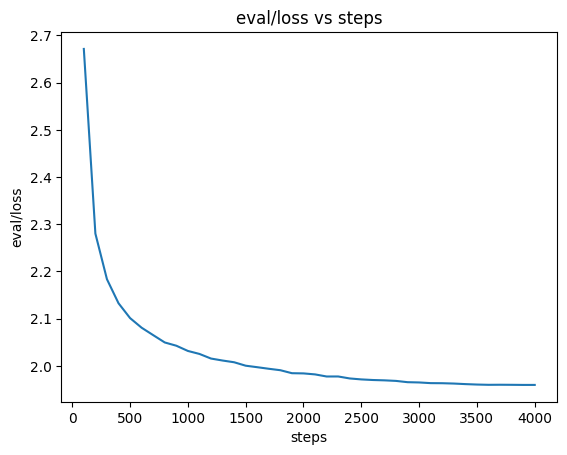

Attention_dim_64
['train/loss', 'train/learning_rate', 'train/epoch', 'eval/loss', 'eval/runtime', 'eval/samples_per_second', 'eval/steps_per_second', 'train/train_runtime', 'train/train_samples_per_second', 'train/train_steps_per_second', 'train/total_flos', 'train/train_loss']
[2.684725284576416, 2.2874574661254883, 2.1893532276153564, 2.1364917755126953, 2.1041452884674072, 2.0834596157073975, 2.0672547817230225, 2.0514140129089355, 2.044487237930298, 2.033379554748535, 2.0272483825683594, 2.017076015472412, 2.012976884841919, 2.0093796253204346, 2.00199556350708, 1.9988670349121094, 1.9955384731292725, 1.9922038316726685, 1.9860270023345947, 1.9856016635894775, 1.98343026638031, 1.9789365530014038, 1.9788234233856201, 1.974823236465454, 1.9726901054382324, 1.9713917970657349, 1.9704145193099976, 1.969223976135254, 1.96675443649292, 1.9660369157791138, 1.9646755456924438, 1.9643954038619995, 1.9637259244918823, 1.9625699520111084, 1.9616321325302124, 1.960999846458435, 1.96117877960

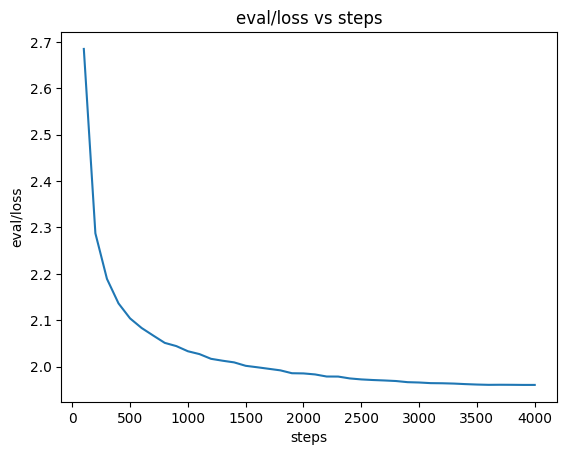

In [30]:
tests = [
    "Attention_dim_4",
    "Attention_dim_8",
    "Attention_dim_16",
    "Attention_dim_32",
    "Attention_dim_64"
]

for test in tests:
    print(test)
    curr_plotter = pu.Plotter(test)
    curr_plotter.print_potential_scalars()
    curr_plotter.plot_scalars(['eval/loss'])

In [9]:
perplexities = []
target_modules_vals = ["wpe", "wte"]
for i in target_modules_vals:
    perplexities.append((i, lt.get_perplexity([1000, 2000, 3000, 4000], "test_data_final.txt", "target_module_" + i, 42)))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
100%|█████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


In [7]:
perplexities1 = perplexities
print(perplexities1)

[('c_attn', [(1000, 7.098493390083313), (2000, 6.601802804470062), (3000, 6.649291682243347), (4000, 6.567124454975128)]), ('c_fc', [(1000, 6.277866704463959), (2000, 6.177611520290375), (3000, 6.163977870941162), (4000, 6.117571861743927)]), ('c_proj', [(1000, 6.738466463088989), (2000, 6.438926255702972), (3000, 6.167201080322266), (4000, 6.506289484500885)]), ('c_projc_attn', [(1000, 6.563970026969909), (2000, 6.083837532997132), (3000, 5.7964745926856995), (4000, 5.66779155254364)])]


In [8]:
with open('target_modules_perps.txt', 'w') as f:
    f.write(str(perplexities))

In [13]:
with open('target_modules_perps.txt', 'w') as f:
    f.write(str(total_perps))

In [11]:
total_perps = perplexities1 + perplexities

In [12]:
print(total_perps)

[('c_attn', [(1000, 7.098493390083313), (2000, 6.601802804470062), (3000, 6.649291682243347), (4000, 6.567124454975128)]), ('c_fc', [(1000, 6.277866704463959), (2000, 6.177611520290375), (3000, 6.163977870941162), (4000, 6.117571861743927)]), ('c_proj', [(1000, 6.738466463088989), (2000, 6.438926255702972), (3000, 6.167201080322266), (4000, 6.506289484500885)]), ('c_projc_attn', [(1000, 6.563970026969909), (2000, 6.083837532997132), (3000, 5.7964745926856995), (4000, 5.66779155254364)]), ('wpe', [(1000, 25.54332239627838), (2000, 21.77239450454712), (3000, 20.87301047325134), (4000, 21.61882460594177)]), ('wte', [(1000, 23.873944396972657), (2000, 23.1949960231781), (3000, 22.82995735168457), (4000, 22.87232419013977)])]


In [ ]:
plotter = pu.Plotter("test_output3")
plotter.print_potential_scalars()
plotter.plot_scalars(['eval/loss'])

In [3]:
lora_tuner = lt.LoRATuner("gpt2", 42)
config = LoraConfig(
        r=16, 
        lora_alpha=32,
        target_modules=["c_proj", "c_attn"],
        lora_dropout=0.1,
        bias="lora_only",
        modules_to_save=["decode_head"],
    )
lora_tuner.tune("yoda_human.txt", "val_data_medium.txt", "joint_training", config, save_steps = 1000, eval_steps = 100, logging_steps = 100, max_steps = 8000, seed = 42)

/Users/rayant/anaconda3/envs/yodaNLP/lib/python3.10/site-packages/peft/tuners/lora/model.py:311: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
/Users/rayant/anaconda3/envs/yodaNLP/lib/python3.10/site-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


./logs/joint_training


Step,Training Loss,Validation Loss
100,3.727900,2.736857
200,2.617000,2.458055
300,2.357200,2.450062
400,2.309200,2.515740
500,2.255200,2.462601
600,2.227600,2.439513
700,2.177400,2.465219
800,2.177600,2.444202
900,2.144800,2.437081
1000,2.116400,2.429588


In [2]:
lora_tuner = lt.LoRATuner("gpt2", 42)
print(lora_tuner.print_potential_target_modules())

mlp.c_proj
transformer.ln_f
attn.c_attn
mlp.c_fc
transformer.wte
transformer.wpe
attn.c_proj
None


In [5]:
attention_dim_vals = [4, 16, 64]
for i in attention_dim_vals:
    lora_tuner = lt.LoRATuner("gpt2", 42)
    config = LoraConfig(
        r=i, 
        lora_alpha=32,
        target_modules=["c_proj", "c_attn", "mlp/c_fc", "mlp/c_proj"],
        lora_dropout=0.1,
        bias="lora_only",
        modules_to_save=["decode_head"],
    )
    lora_tuner.tune("train_data_final.txt", "val_data_medium.txt", "Attention_dim_new" + str(i), config, save_steps = 100, eval_steps = 100, logging_steps = 100, max_steps = 100, seed = 42)


./logs/Attention_dim_new4


Step,Training Loss,Validation Loss
100,3.876800,3.176681


/Users/rayant/anaconda3/envs/yodaNLP/lib/python3.10/site-packages/peft/tuners/lora/model.py:311: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
/Users/rayant/anaconda3/envs/yodaNLP/lib/python3.10/site-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


./logs/Attention_dim_new16


Step,Training Loss,Validation Loss
100,3.881800,3.175008


/Users/rayant/anaconda3/envs/yodaNLP/lib/python3.10/site-packages/peft/tuners/lora/model.py:311: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
/Users/rayant/anaconda3/envs/yodaNLP/lib/python3.10/site-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


./logs/Attention_dim_new64


Step,Training Loss,Validation Loss
100,3.873000,3.173496


In [ ]:
lora_tuner = lt.LoRATuner("gpt2", 42)
perplexities = []
files = ["yoda_prompt", "human_prompt"]
for i in files:
    perplexities.append((i, lt.get_perplexity([2000, 4000, 6000, 8000], i + ".txt", "joint_training", 42, "***")))
print(perplexities)
with open('joint_training_perps.txt', 'w') as f:
    f.write(str(perplexities))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene